## Imports

In [2]:
# pyqubo stuff
from pyqubo import Array, Constraint, Placeholder, solve_qubo


import math
import matplotlib.pyplot as plt
import numpy as np
import random
import re

## Constants

In [3]:
SQUARE_SIZE = 3
BITS = SQUARE_SIZE * SQUARE_SIZE

In [4]:
# get the vector index given the i, j, k magic square matrix identifiers
def get_index(i, j, k):
    
    # we need to know the length of the magic square matrix horizontally
    row_length = BITS * SQUARE_SIZE
    
    return int((i*row_length) + (j*BITS) + k)

## Magic Square Implementation

$$S_{\text{col=i}} = \sum_{j=1}^{n}\sum_{k=1}^{s}x_{i,j,k}$$
$$P_{\text{col}} = \sum_{i1>i2}^{n}\left[\sum_{j=1}^{n}\sum_{k=1}^{s}x_{i2,j,k} * k - \sum_{j=1}^{n}\sum_{k=1}^{s}x_{i1,j,k} * k\right]^2$$

In [5]:
def implement_row(H, variables, penalty):
    """Ensure the all rows sum to the magic constant

    Args:
        variables (Array -> Binary): the binary variables that are being used to encode the results
        penalty (Int): a quantity which scales the impact of the penalty on the objective function
    """
    for i1 in range(SQUARE_SIZE):
        for i2 in range(i1+1, SQUARE_SIZE):
            print(f"{i1} {i2}")

            H_tmp = 0
            
            for j in range(SQUARE_SIZE):
                for k in range(BITS):
                    H_tmp += variables[get_index(i1, j, k)] * k

            for j in range(SQUARE_SIZE):
                for k in range(BITS):
                    H_tmp -= variables[get_index(i2, j, k)] * k

            H_tmp **= 2
            H += Constraint(H_tmp, label="row_constraint")
    
    return penalty * H

$$S_{\text{col=j}} = \sum_{i=1}^{n}\sum_{k=1}^{s}x_{i,j,k}$$
$$P_{\text{col}} = \sum_{j1>j2}^{n}\left[\sum_{i=1}^{n}\sum_{k=1}^{s}x_{i,j2,k} * k - \sum_{i=1}^{n}\sum_{k=1}^{s}x_{i,j1,k} * k\right]^2$$

In [6]:
def implement_column(H, variables, penalty=1):
    """Aim is to ensure all columns sum to the magic constant

    
    Args:
        variables (_type_): _description_
        penalty (_type_): _description_
    """
    
    for j1 in range(SQUARE_SIZE):
        for j2 in range(j1+1, SQUARE_SIZE):

            H_tmp = 0
            
            for i in range(SQUARE_SIZE):
                for k in range(BITS):
                    H_tmp += variables[get_index(i, j2, k)] * k

            for i in range(SQUARE_SIZE):
                for k in range(BITS):
                    H_tmp -= variables[get_index(i, j1, k)] * k

            H_tmp **= 2
            H += Constraint(H_tmp, label="column_constraint")
    
    return penalty * H

$$P_{\text{diag}} = $$

In [7]:
def implement_diagonal(variables, penalty):
    """Aim is to ensure the diagonal sums to the magic constant

    Args:
        variables (Array -> Binary): the binary variables that are being used to encode the results
        penalty (Int): a quantity which scales the impact of the penalty on the objective function
    """
    pass

$$P_{\text{unique}} = \sum_{k=1}^{s}\left[(\sum_{i=1}^{n}\sum_{j=1}^{n}x_{i,j,k}) - 1\right]^2$$

In [8]:
def implement_unique(H, variables, penalty):
    """Aim is to make sure the each number in the magic square is unique

    Args:
        variables (Array -> Binary): the binary variables that are being used to encode the results
        penalty (Int): a quantity which scales the impact of the penalty on the objective function
    """

    for k in range(BITS):
        H += Constraint(penalty * (sum(variables[get_index(i,j,k)] for i in range(SQUARE_SIZE) for j in range(SQUARE_SIZE)) - 1) ** 2, label="unique")

    return H

$$P_{\text{ohe}} = \sum_{i}^{n}\sum_{j}^{n}\left[(\sum_{k}^{s}x_{i,j,k}) - 1\right]^2$$

In [9]:
def implement_ohe(H, variables, penalty):
    """Aim is to ensure that the results produced only have one bit set to 1 for a valid encoding


    Args:
        variables (Array -> Binary): the binary variables that are being used to encode the results
        penalty (Int): a quantity which scales the impact of the penalty on the objective function
    """
    
    for i in range(SQUARE_SIZE):
        for j in range(SQUARE_SIZE):
            H_tmp = 0
            
            for k in range(BITS):
                H_tmp += variables[get_index(i,j,k)]

            # H += Constraint(penalty * (H_tmp - 1) ** 2, label="one_hot_encoding")
            H += Constraint(penalty * ((H_tmp**2) - (2 * H_tmp) + 1) , label="one_hot_encoding")

    return H



## Construct QUBO

0 1
0 2
1 2
((1.000000 * (Constraint((((-1.000000 * (Binary('x[71]') * 8.000000)) + (-1.000000 * (Binary('x[70]') * 7.000000)) + (-1.000000 * (Binary('x[69]') * 6.000000)) + (-1.000000 * (Binary('x[68]') * 5.000000)) + (-1.000000 * (Binary('x[67]') * 4.000000)) + (-1.000000 * (Binary('x[66]') * 3.000000)) + (-1.000000 * (Binary('x[65]') * 2.000000)) + (-1.000000 * (Binary('x[64]') * 1.000000)) + (-1.000000 * (Binary('x[63]') * 0.000000)) + (-1.000000 * (Binary('x[44]') * 8.000000)) + (-1.000000 * (Binary('x[43]') * 7.000000)) + (-1.000000 * (Binary('x[42]') * 6.000000)) + (-1.000000 * (Binary('x[41]') * 5.000000)) + (-1.000000 * (Binary('x[40]') * 4.000000)) + (-1.000000 * (Binary('x[39]') * 3.000000)) + (-1.000000 * (Binary('x[38]') * 2.000000)) + (-1.000000 * (Binary('x[37]') * 1.000000)) + (-1.000000 * (Binary('x[36]') * 0.000000)) + (-1.000000 * (Binary('x[17]') * 8.000000)) + (-1.000000 * (Binary('x[16]') * 7.000000)) + (-1.000000 * (Binary('x[15]') * 6.000000)) + (-1.000000 * (Bi

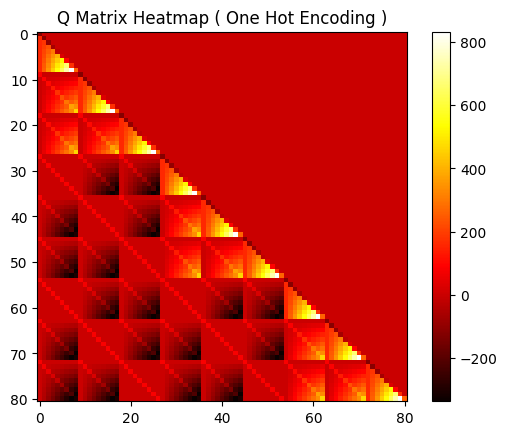

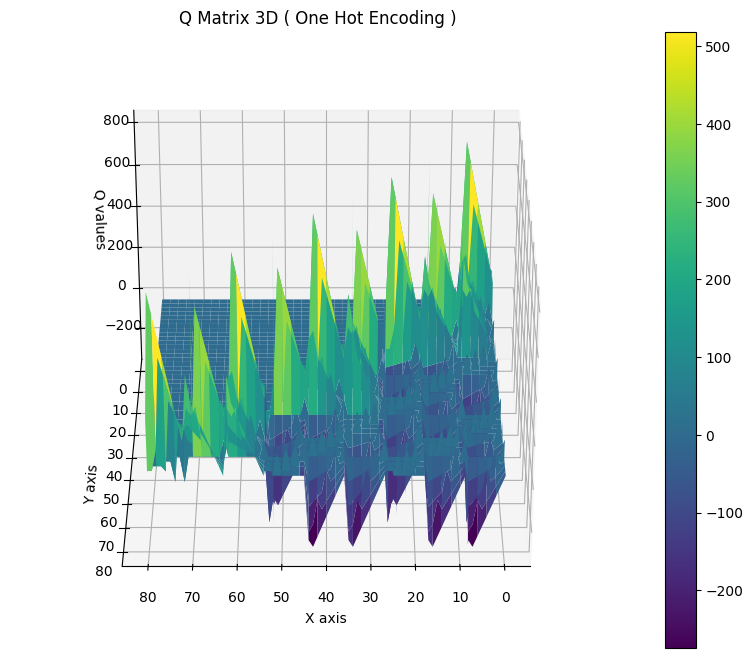

In [11]:
def show_2d(H):
    model = H.compile()
    qubo, offset = model.to_qubo()

    Q = np.zeros((SQUARE_SIZE * SQUARE_SIZE * BITS, SQUARE_SIZE * SQUARE_SIZE * BITS))

    for key, value in qubo.items():
        i = int(re.search(r'\[(\d+)\]', key[0]).group(1))
        j = int(re.search(r'\[(\d+)\]', key[1]).group(1))

        if i > j:
            Q[i][j] = value
        elif i <= j:
            Q[j][i] = value


    plt.title("Q Matrix Heatmap ( One Hot Encoding )")
    plt.imshow(Q, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

def show_3d(H):

    model = H.compile()
    qubo, offset = model.to_qubo()

    Q = np.zeros((SQUARE_SIZE * SQUARE_SIZE * BITS, SQUARE_SIZE * SQUARE_SIZE * BITS))

    for key, value in qubo.items():
        i = int(re.search(r'\[(\d+)\]', key[0]).group(1))
        j = int(re.search(r'\[(\d+)\]', key[1]).group(1))

        if i > j:
            Q[i][j] = value
        elif i <= j:
            Q[j][i] = value
    
    # Create a meshgrid for the indices of the Q matrix
    x = np.arange(Q.shape[0])
    y = np.arange(Q.shape[1])
    x, y = np.meshgrid(x, y)

    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(x, y, Q, cmap='viridis')

    # Add a color bar which maps values to colors
    fig.colorbar(surf)
        
    # Set labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Q values')

    # Set title
    ax.set_title('Q Matrix 3D ( One Hot Encoding )')

    ax.view_init(elev=30, azim=90)  # Adjust 'elev' as needed for better visibility

    plt.show()

array = Array.create('x', SQUARE_SIZE * SQUARE_SIZE * BITS, 'BINARY')

# apply constraints
H = 0

H += implement_ohe(H, array, 10)
H += implement_unique(H, array, 10)
H += implement_row(H, array, 1)
H += implement_column(H, array, 1)



print(H)

show_2d(H)
show_3d(H)




## Perform Simulated Annealing

In [47]:
import neal

# compile and convert to binary quadratic model
model = H.compile()
bqm = model.to_bqm()

# simulate
sa = neal.SimulatedAnnealingSampler()
sampleset = sa.sample(bqm, num_reads=5000)
decoded_samples = model.decode_sampleset(sampleset)

# decode
solutions = []

for solution in decoded_samples:
    
    # get the sample and energy
    sample = solution.sample
    energy = solution.energy

    # split the sample values into bit sized chunks
    # sample = np.array([list(sample.values())[i:i+BITS] for i in range(0, len(sample), BITS)]).reshape((SQUARE_SIZE, SQUARE_SIZE, BITS))
    sample = np.array([sample[f"x[{i}]"] for i in range(SQUARE_SIZE * SQUARE_SIZE * BITS)]).reshape((SQUARE_SIZE, SQUARE_SIZE, BITS))  

    solutions.append({"sample": sample, "energy": energy})

In [83]:
# save the solutions
np.save(f"solutions_{SQUARE_SIZE}.npy", {"solutions": solutions, "time": sampleset.info["timing"]})

## Perform Real Annealing

In [84]:
# save the solutions
np.save(f"solutions_{SQUARE_SIZE}.npy", {"solutions": solutions, "time": sampleset.info["timing"]})

## Analyse

In [51]:
def get_grid(sample):
    grid = np.zeros((SQUARE_SIZE, SQUARE_SIZE))
    
    for i in range(SQUARE_SIZE):
        for j in range(SQUARE_SIZE):

            # get the item
            item = list(sample[i][j])
            
            if sum(item) == 1:
                index = item.index(1) + 1
                grid[i][j] = index
            else:
                grid[i][j] = -1
    return np.array(grid)

def get_grid_nice(sample):
    grid = get_grid(sample)
    for row in grid:
        for element in row:
            print(int(element), end=" ")
        print(f" = {sum(row)}")

    for i in range(len(grid[0])):
        print("=", end=" ")
    print()
    
    for i in range(len(grid[0])):
        print(f" {int(sum(grid[:,i]))}", end=" ")
    print("\n\n")


def check_ohe(sample):
    
    count = 0

    # count how many samples are not one hot encoded
    for i in range(SQUARE_SIZE):
        for j in range(SQUARE_SIZE):
            if sum(sample[i][j]) != 1:
                count += 1

    # return the number of samples that are not one hot encoded
    if count > 0:
        return count

    # return True if all samples are one hot encoded
    return True


def check_unique(sample):
    for k in range(BITS):
        if sum([sample[i][j][k] for i in range(SQUARE_SIZE) for j in range(SQUARE_SIZE)]) != 1:
            return False
    return True


def check_sum_col(sample):

    # get grid and sum cols
    grid = get_grid(sample)
    sums = [int(sum(grid[:,i])) for i in range(SQUARE_SIZE)]

    # test for equality
    if len(set(sums)) == 1:
        return True
    return False

def check_sum_row(sample):
    
    # get grid and sum rows
    grid = get_grid(sample)
    sums = [int(sum(grid[i,:])) for i in range(SQUARE_SIZE)]

    # test for equality
    if len(set(sums)) == 1:
        return True
    return False

def check_magic(sample):
    
    if check_sum_col(sample) and check_sum_row(sample) and check_unique(sample) and check_ohe(sample):
        return True
    return False

    
ohe_incorrect = {}

ohe = 0
unique = 0
sumcol = 0
sumrow = 0
magic = 0

for solution in solutions:
    if check_ohe(solution["sample"]) is True:
        ohe += 1
    else:
        count = check_ohe(solution["sample"])
        if count in ohe_incorrect:
            ohe_incorrect[count] += 1
        else:
            ohe_incorrect.setdefault(count, 1)
            
        continue # avoid checking for unique if the ohe is not correct

    # print(get_grid(solution["sample"]))
    
    if check_unique(solution["sample"]):
        unique += 1

    if check_sum_col(solution["sample"]):
        sumcol += 1

    if check_sum_row(solution["sample"]):
        sumrow += 1

    if check_magic(solution["sample"]):
        get_grid_nice(solution["sample"])
        magic += 1

print(f"OHE Correct: {ohe}/{len(solutions)}")
print(f"Unique Correct: {unique}/{len(solutions)}")
print(f"Sum Column Correct: {sumcol}/{len(solutions)}")
print(f"Sum Row Correct: {sumrow}/{len(solutions)}")
print(f"OHE Incorrect: {ohe_incorrect}")
print(f"Magic Square Correct: {magic}/{len(solutions)}")


6 1 8  = 15.0
2 9 4  = 15.0
7 5 3  = 15.0
= = = 
 15  15  15 


9 1 5  = 15.0
4 8 3  = 15.0
2 6 7  = 15.0
= = = 
 15  15  15 


9 1 5  = 15.0
2 6 7  = 15.0
4 8 3  = 15.0
= = = 
 15  15  15 


2 9 4  = 15.0
7 5 3  = 15.0
6 1 8  = 15.0
= = = 
 15  15  15 


4 9 2  = 15.0
8 1 6  = 15.0
3 5 7  = 15.0
= = = 
 15  15  15 


5 9 1  = 15.0
7 2 6  = 15.0
3 4 8  = 15.0
= = = 
 15  15  15 


3 8 4  = 15.0
7 6 2  = 15.0
5 1 9  = 15.0
= = = 
 15  15  15 


4 8 3  = 15.0
9 1 5  = 15.0
2 6 7  = 15.0
= = = 
 15  15  15 


4 8 3  = 15.0
9 1 5  = 15.0
2 6 7  = 15.0
= = = 
 15  15  15 


2 7 6  = 15.0
4 3 8  = 15.0
9 5 1  = 15.0
= = = 
 15  15  15 


2 7 6  = 15.0
4 3 8  = 15.0
9 5 1  = 15.0
= = = 
 15  15  15 


2 7 6  = 15.0
4 3 8  = 15.0
9 5 1  = 15.0
= = = 
 15  15  15 


6 7 2  = 15.0
1 5 9  = 15.0
8 3 4  = 15.0
= = = 
 15  15  15 


6 7 2  = 15.0
1 5 9  = 15.0
8 3 4  = 15.0
= = = 
 15  15  15 


7 6 2  = 15.0
5 1 9  = 15.0
3 8 4  = 15.0
= = = 
 15  15  15 


7 6 2  = 15.0
3 8 4  = 15.0
5 1 9  = 15.

## Show Example

In [14]:

def to_decimal(item):
    if sum(item) == 1:
        return item.index(1) + 1
    else:
        return -1

def get_grid(sample):
    
        
    grid = np.zeros((SQUARE_SIZE, SQUARE_SIZE))
    
    for i in range(SQUARE_SIZE):
        for j in range(SQUARE_SIZE):

            # get the item
            item = list(sample[i][j])

            # convert binary value to decimal
            grid[i][j] = to_decimal(item)
            
    return np.array(grid)

# condense into count
def condense_results(solutions):
    
    condensed = {}
    
    for solution in solutions:
        sample = solution["sample"]
        energy = solution["energy"]

        # extract the values
        key = str(sample.flatten())
        
        if key not in condensed:
            condensed[key] = {"count": 0, "energy": energy, "sample": sample}
        
        condensed[key]["count"] += 1
    
    return condensed

condensed = condense_results(solutions)

for key, value in condensed.items():
    print(f"{value['sample']}")
    print(get_grid(np.array([int(i) for i in key[1:-1].split(" ")]).reshape((SQUARE_SIZE, SQUARE_SIZE, BITS))))
    print(f"count: {value['count']}")
    print(f"energy: {value['energy']}")
    print("\n\n")

[[[0 0 0 0 0 0 0 0 1]
  [0 0 0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0 1 0]]

 [[0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 1 1 1 0]
  [0 0 0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 1 1 0]
  [0 1 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 1]]]
[[ 9.  5. -1.]
 [ 3. -1.  4.]
 [-1.  2. -1.]]
count: 1
energy: 23.0



[[[0 0 0 1 0 0 0 1 0]
  [0 1 0 0 0 1 0 0 0]
  [0 0 0 1 0 0 1 0 0]]

 [[0 0 0 0 1 0 0 0 0]
  [0 0 1 0 0 0 0 0 1]
  [0 0 0 0 1 0 0 1 0]]

 [[0 0 0 0 0 1 1 0 0]
  [0 1 0 0 0 0 0 0 1]
  [0 0 0 0 0 1 0 0 0]]]
[[-1. -1. -1.]
 [ 5. -1. -1.]
 [-1. -1.  6.]]
count: 1
energy: 25.0



[[[0 0 0 0 0 0 0 0 1]
  [0 1 0 1 0 0 0 0 1]
  [1 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 1 0 0 0]
  [0 1 1 0 0 0 0 0 0]
  [0 0 1 0 1 0 1 0 0]]

 [[0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 1]]]
[[ 9. -1.  1.]
 [ 6. -1. -1.]
 [ 8.  6.  9.]]
count: 1
energy: 25.0



[[[0 0 0 0 1 0 1 0 0]
  [0 1 0 0 0 0 0 0 1]
  [0 0 0 1 1 0 0 0 0]]

 [[0 1 0 0 0 0 0 1 0]
  [0 0 0 1 0 0 0 0 1]
  [0 0 0 0 0 0 0 1 0]]

 [[0 0 0 1 0 1 0 0 0]
  [0 0 0 0 0 0 1 

## Tuning